# Markov Chain Monte Carlo
### MA 583 Extra Credit Project: Derived Python version from Matlab code
#### Vindhya Kuchibhotla 

### 1. Gibbs Sampling
#### Compute true joint distribution when $X|Y$ ~ $Pois(\frac{y}{2} + 1)$, $Y|X$ ~ $Bin(10, \frac{x+2}{x+10})$ 

In [1]:
from scipy.stats import binom, poisson
import numpy as np
from matplotlib import pyplot as plt

mu_x = 0
mu_y = 0
p = np.zeros( (10, 10) )

### Calculate p, mu_x, and mu_y
for x in range(1,11):
        for y in range(1,11):
                z = poisson.pmf(x, y/2 + 1)
                
                x1 = poisson.pmf(range(0,101), y/2 + 1)
                
                y1 = 2 + np.array(range(0, 101))
                y2 = 10 + np.array(range(0, 101))
                
                x2 = binom.pmf(y, 10, np.true_divide(y1, y2))
                
                s = sum(np.true_divide(x1, x2))
                p[x-1][y-1]= z/s
                
                mu_x = mu_x+x*p[x-1][y-1]
                mu_y = mu_y+y*p[x-1][y-1]
                
print("mu_x is", mu_x)
print("mu_y is", mu_y)

mu_x is 2.508195991480612
mu_y is 3.021669691406343


#### Estimate p by Gibbs Sampling


Sample mu_x is 2.769230769230769
Sample mu_y is 3.4395604395604398


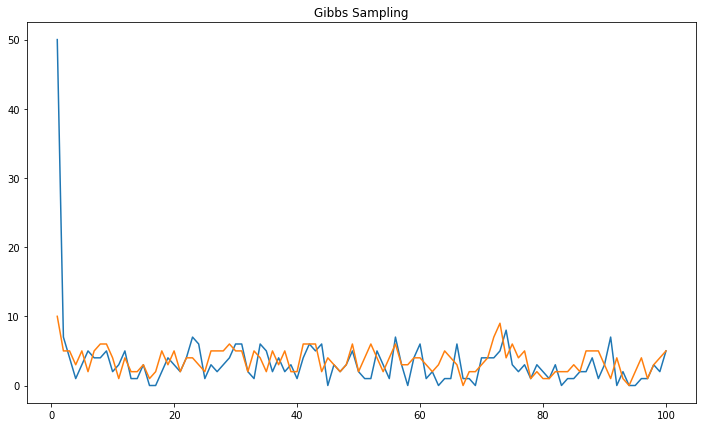

In [2]:
from matplotlib import pyplot as plt

x = np.arange(100)
y = np.arange(100)
x[0]=50
y[0]=10
for i in range(1,100):
    x[i]=np.random.poisson(y[i-1]/2+1)
    y[i]=np.random.binomial(10,(2+x[i])/(10+x[i]));

#print(x)
#print(y)

### Plot the 100 iterations
axis_ints = np.array(range(1, 101))
plt.rcParams['figure.figsize'] = [12, 7]
plt.title("Gibbs Sampling")
plt.plot(axis_ints,x,axis_ints,y)

### After the burn-in period, take the mean from the last 90 samples
print("Sample mu_x is",np.mean(x[9:]))
print("Sample mu_y is",np.mean(y[9:]))

### 2. Metropolis Algorithm

In [21]:
x = np.array(range(1, 101))
y = np.array(range(1, 101))

### Calculating p
a = np.array(np.power(x.transpose(),3))
a.shape = (100,1)
b = np.ones( len(y) )
b.shape = (1,100)
ab = np.dot(a,b)

e = np.array(np.power(x.transpose(),2))
e.shape = (100,1)
f = np.array(np.power(y,2))
f.shape = (1,100)
ef = np.dot(e,f)

c = np.ones( (len(x.transpose()), 1) )
c.shape = (100,1)
d = np.array(np.power(y,3))
d.shape = (1, 100)
cd = np.dot(c,d)

p1 = ab + ef + cd + 1
p = np.true_divide(1,p1)
p = np.true_divide(p, sum(sum(p)))
# print(p)


### Calculating mu_x and mu_y from p
a = np.array(x.transpose())
a.shape = (100,1)
b = np.ones( len(y) )
b.shape = (1,100)
mu_x = sum(sum(np.dot(a,b) * p))

c = np.ones( (len(x.transpose()), 1) )
c.shape = (100,1)
y.shape = (1,100)
mu_y = sum(sum(np.dot(c,y) * p))


print("mu_x is ", mu_x)
print("mu_y is ", mu_y)

mu_x is  2.788561231841214
mu_y is  2.7885612318412116


#### Sampling and plotting 10,000 iterations


Sample mu_x is:  1.4887
Sample mu_y is:  1.1748


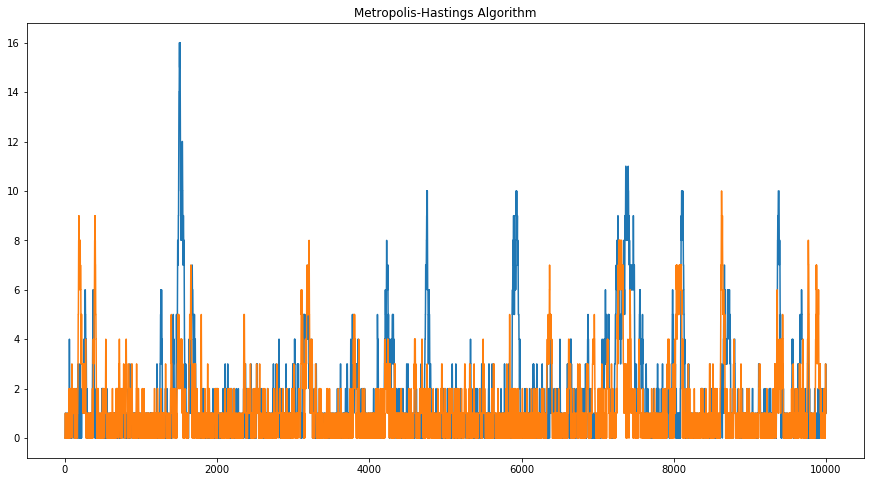

In [22]:
from matplotlib import pyplot as plt

### 10,000 iterations
x = np.arange(10000)
y = np.arange(10000)
x[0]=0
y[0]=0
for i in range(2,10001):
    qx = abs(x[i-2]+(np.random.binomial(2,.5)-1));
    qy = abs(y[i-2]+(np.random.binomial(2,.5)-1));
    condition = (x[i-2]**3 + x[i-2]**2 * y[i-2]**2 + y[i-2]**3 + 1)/(qx**3 + qx**2 * qy**2 + qy**3 + 1)
    #print(condition)
    if np.random.uniform(0,1) < condition :
        x[i-1]=qx
        y[i-1]=qy
    else:
        x[i-1]=x[i-2]
        y[i-1]=y[i-2]

### Plotting iterations
axis_ints = np.array(range(1, 10001))
plt.rcParams['figure.figsize'] = [15, 8]
plt.title("Metropolis-Hastings Algorithm")
plt.plot(axis_ints,x,axis_ints,y) 

### Find sample means
print("Sample mu_x is: ", np.mean(x))
print("Sample mu_y is: ", np.mean(y))